<a href="https://colab.research.google.com/github/alexkabu-M2K/Colab_Google_Estacio/blob/main/Image_Recoginzed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(total de imagens, dimensão 1, dimensão 2)=(60000, 28, 28)
rótulos=[9 0 0 ... 3 0 5] - São rotulados nas classes 0, 1, 2, 3, ...,9
(total de imagens para teste, dimensão 1, dimensão 2)=(10000, 28, 28)


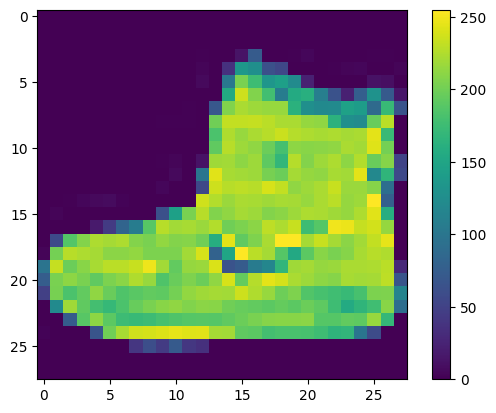

Explicação: exibindo a primeira imagem da base. Os dados numéricos se referem aos Pixels de 0 a 255.


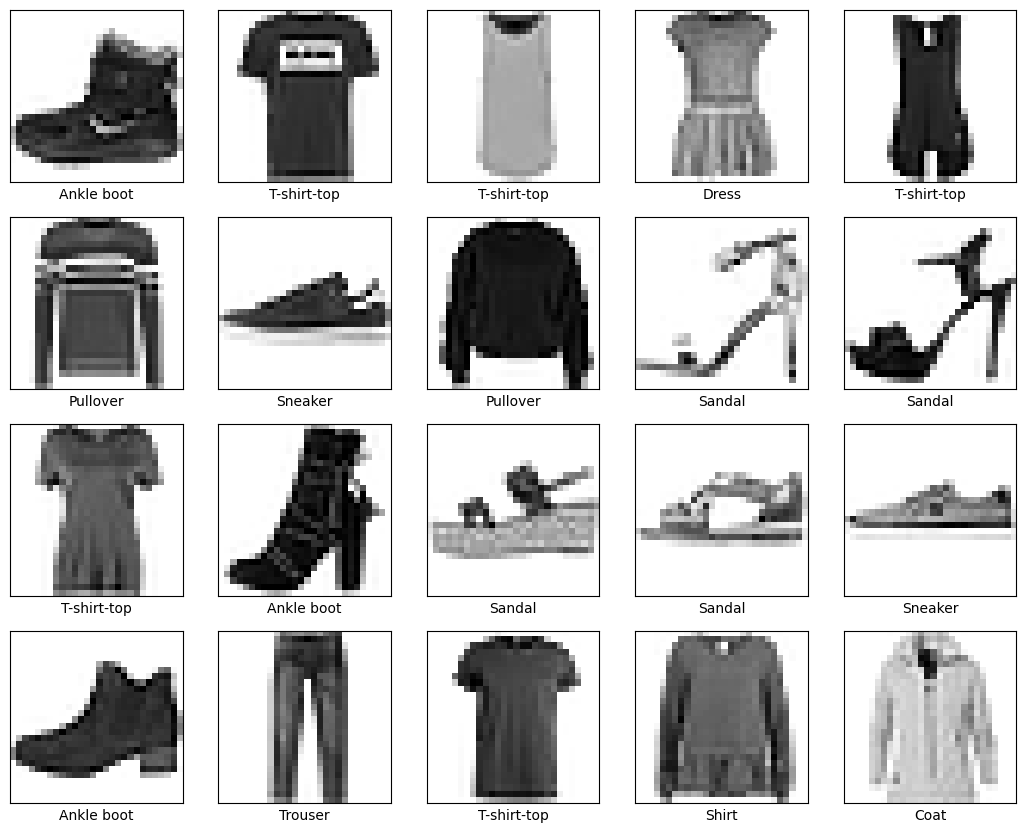

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6738 - loss: 9.4501
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7263 - loss: 0.6954
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7758 - loss: 0.5947
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8013 - loss: 0.5469
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8245 - loss: 0.5040
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8216 - loss: 0.5062
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8270 - loss: 0.4982
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8286 - loss: 0.4963
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8341 - loss: 0.4859
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8357 - loss: 0.4828
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8401 - loss: 0.4714
Epoch 12/50
1875/1875 ━━━━━

Text(0.5, 1.0, 'Sandal')

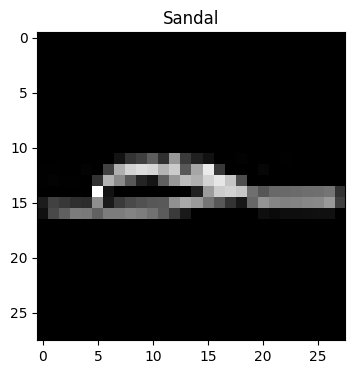

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(treinamento_imagens, treinamento_rotulos), (teste_imagens, teste_rotulos) = fashion_mnist.load_data()

nomes_classes = ['T-shirt-top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f'(total de imagens, dimensão 1, dimensão 2)={treinamento_imagens.shape}')
print(f'rótulos={treinamento_rotulos} - São rotulados nas classes 0, 1, 2, 3, ...,9')
print(f'(total de imagens para teste, dimensão 1, dimensão 2)={teste_imagens.shape}')

plt.figure()
plt.imshow(treinamento_imagens[0])
plt.colorbar()
plt.grid(False)
plt.show()
print('Explicação: exibindo a primeira imagem da base. Os dados numéricos se referem aos Pixels de 0 a 255.')

treinamento_images = treinamento_imagens / 255.0
teste_imagens = teste_imagens / 255.0

plt.figure(figsize=(13,13))
for i in range(20):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(treinamento_imagens[i], cmap=plt.cm.binary)
 plt.xlabel(nomes_classes[treinamento_rotulos[i]])
plt.show()

modelo = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation=tf.nn.relu),
keras.layers.Dense(10, activation=tf.nn.softmax)
])

modelo.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

modelo.fit(treinamento_imagens,
 treinamento_rotulos,
 epochs=50)

perda_teste, precisao_teste = modelo.evaluate(teste_imagens, teste_rotulos)
print('Precisão dos Testes:', precisao_teste)

predicoes = modelo.predict(teste_imagens)

predicoes[0]

melhor_classificacao=np.argmax(predicoes[0])
print(f'Posição do melhor resultado da primeira imagem de teste: {melhor_classificacao}')

plt.figure(figsize=(14,4))
plt.imshow(np.reshape(teste_imagens[melhor_classificacao], (28,28)), cmap=plt.cm.gray)
plt.title(nomes_classes[teste_rotulos[melhor_classificacao]])